# Project: Plant Seedlings Classicication.

### Data Description:

- You are provided with a training set and a test set of images of plant seedlings at various stages of grown. 
- Each image has a filename that is its unique id. 
- The dataset comprises 12 plant species.
- The goal of the competition is to create a classifier capable of determining a plant's species from a photo.

### Dataset:
- The project is from a dataset from Kaggle.
- Link to the Kaggle project site:https://www.kaggle.com/c/plant-seedlings-classification/data
- The dataset has to be downloaded from the above Kagglewebsite.

### Context:

- Can you differentiate a weed from a crop seedling?
- The ability to do so effectively can mean better crop yields and better stewardship of the environment.
- The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages.

### Objective:
- To implement the techniques learnt as a part of the course.

### Learning Outcomes:
- Pre-processing of image data.
- Visualization of images.
- Building CNN.
- Evaluate the Model.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import necessary libraries.
import cv2
import math
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
# Set the path to the dataset folder. (The dataset contains image folder: "train")
train_path = "/content/drive/My Drive/Colab Notebooks/data/plant_seedlings/train.zip"

In [4]:
# Make different folders for train and test data in the current directory of Google Colab notebook. (using mkdir)
!mkdir temp_train

mkdir: cannot create directory ‘temp_train’: File exists


# Unziping train file:

In [5]:
# Extract the files from dataset to temp_train and temp_test folders (as the dataset is a zip file.)
from zipfile import ZipFile
with ZipFile(train_path, 'r') as zip:
  zip.extractall('./temp_train')

In [6]:
path = "./temp_train/*/*.png"                              # The path to all images in training set. (* means include all folders and files.)
files = glob(path)

trainImg = []                                              # Initialize empty list to store the image data as numbers.
trainLabel = []                                            # Initialize empty list to store the labels of images
j = 1
num = len(files)

# Obtain images and resizing, obtain labels
for img in files:
    '''
    Append the image data to trainImg list.
    Append the labels to trainLabel list.
    '''
    print(str(j) + "/" + str(num), end="\r")
    trainImg.append(cv2.resize(cv2.imread(img), (128, 128)))  # Get image (with resizing to 128x128)
    trainLabel.append(img.split('/')[-2])  # Get image label (folder name contains the class to which the image belong)
    j += 1

trainImg = np.asarray(trainImg)  # Train images set
trainLabel = pd.DataFrame(trainLabel)  # Train labels set

In [7]:
print(trainImg.shape)
print(trainLabel.shape)

(4750, 128, 128, 3)
(4750, 1)


###  Visualise the images

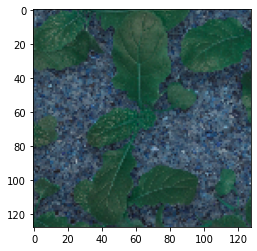

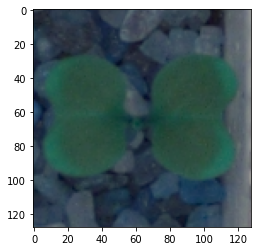

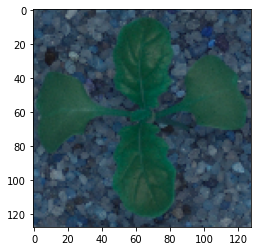

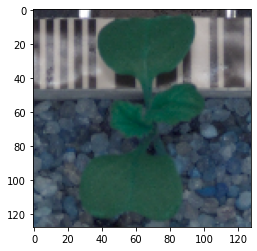

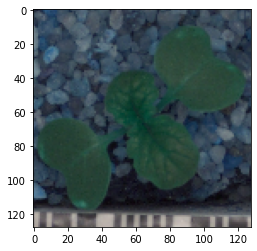

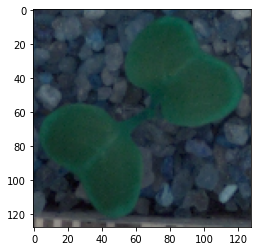

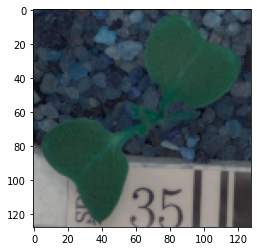

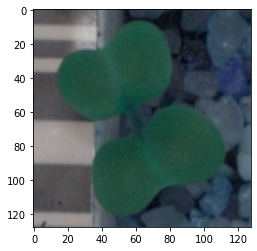

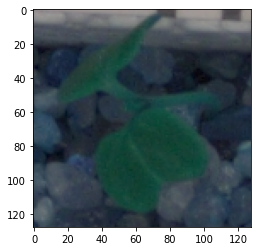

In [8]:
for i in range(1,10):
  plt.imshow(trainImg[i])
  plt.show()

Normalization

In [9]:
trainImg = trainImg/255.

In [10]:
trainImg.shape

(4750, 128, 128, 3)

Blurring

In [11]:
blurredImages = []
for i in range(len(trainImg)):
  img = trainImg[i]

  blurred_image = cv2.GaussianBlur(img,(0,0),cv2.BORDER_DEFAULT)

  blurredImages.append(blurred_image)

In [12]:
blurredImagesArr = np.asarray(blurredImages)

In [13]:
blurredImagesArr.shape

(4750, 128, 128, 3)

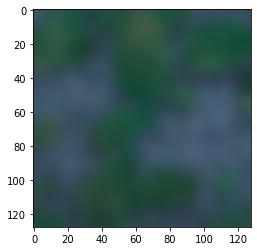

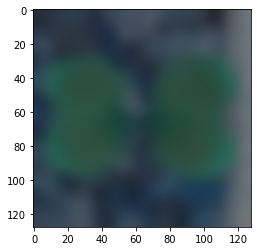

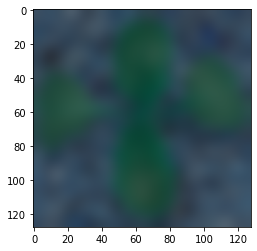

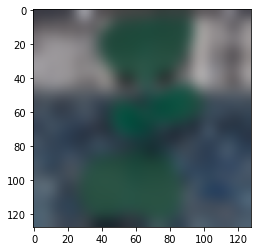

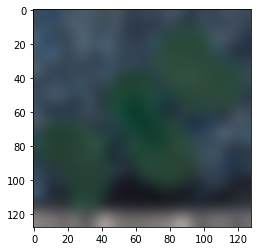

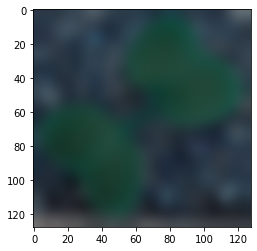

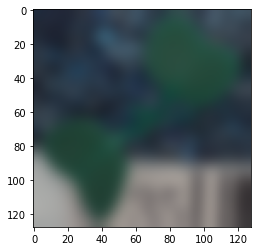

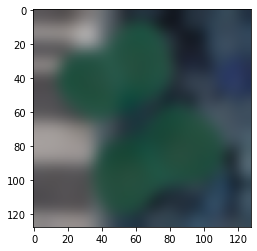

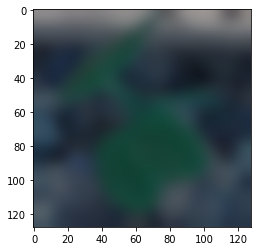

In [14]:
for i in range(1,10):
  plt.imshow(blurredImagesArr[i])
  plt.show()

### Make data compatible

In [15]:
trainLabel.columns=["labels"]

In [16]:
trainLabel["labels"].nunique()

12

In [17]:
trainLabel

,labels
0,Charlock
1,Charlock
2,Charlock
3,Charlock
4,Charlock
...,...
4745,Maize
4746,Maize
4747,Maize
4748,Maize


In [18]:
trainLabel["labels"].unique()

array(['Charlock', 'Small-flowered Cranesbill', 'Common Chickweed',
       'Cleavers', 'Fat Hen', 'Loose Silky-bent', 'Sugar beet',
       'Black-grass', 'Scentless Mayweed', 'Shepherds Purse',
       'Common wheat', 'Maize'], dtype=object)

In [19]:
label_map = {
    'Cleavers':1, 'Charlock':2, 'Sugar beet':3, 'Loose Silky-bent':4,
       'Black-grass':5, 'Common wheat':6, 'Fat Hen':7, 'Scentless Mayweed':8,
       'Shepherds Purse':9, 'Maize':10, 'Common Chickweed':11,
       'Small-flowered Cranesbill':12
}
label_map

{'Black-grass': 5,
 'Charlock': 2,
 'Cleavers': 1,
 'Common Chickweed': 11,
 'Common wheat': 6,
 'Fat Hen': 7,
 'Loose Silky-bent': 4,
 'Maize': 10,
 'Scentless Mayweed': 8,
 'Shepherds Purse': 9,
 'Small-flowered Cranesbill': 12,
 'Sugar beet': 3}

In [20]:
trainLabel["labels"].map(label_map).nunique()

12

One hot Encoding the labels

In [22]:
y = pd.get_dummies(trainLabel["labels"])
y = y.values
y.shape


(4750, 12)

Train Test Split

In [23]:
from sklearn.model_selection import train_test_split



In [24]:
## Split the dataset into training, testing and validation

In [25]:
X_train, X_test, y_train, y_test = train_test_split( blurredImagesArr, y, test_size=0.3, random_state=42)

In [26]:
X_test, X_valid, y_test, y_valid = train_test_split( X_test, y_test, test_size=0.5, random_state=42)

In [27]:
X_train.shape , y_train.shape

((3325, 128, 128, 3), (3325, 12))

In [28]:
X_test.shape , y_test.shape

((712, 128, 128, 3), (712, 12))

In [29]:
X_valid.shape , y_valid.shape

((713, 128, 128, 3), (713, 12))

In [32]:
label_df=pd.DataFrame(list(label_map.items()),columns = ['label','value'])

In [33]:
label_df

,label,value
0,Cleavers,1
1,Charlock,2
2,Sugar beet,3
3,Loose Silky-bent,4
4,Black-grass,5
5,Common wheat,6
6,Fat Hen,7
7,Scentless Mayweed,8
8,Shepherds Purse,9
9,Maize,10


In [34]:
label_df[label_df.value==y_train[0].argmax()]

,label,value
5,Common wheat,6


### Building CNN

In [51]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(128,128,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.2))


model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))



model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Dropout(0.2))




model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))



model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))


model.add(Dense(12,activation="softmax"))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 32)       

In [53]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [54]:
results = model.fit(X_train,y_train,epochs=500,
                              validation_data=(X_valid,y_valid),
                             callbacks=[early_stop])

Epoch 1/500
104/104 [==============================] - 70s 678ms/step - loss: 2.2588 - accuracy: 0.2009 - val_loss: 1.9270 - val_accuracy: 0.3506
Epoch 2/500
104/104 [==============================] - 87s 832ms/step - loss: 1.7267 - accuracy: 0.3756 - val_loss: 1.5764 - val_accuracy: 0.4334
Epoch 3/500
104/104 [==============================] - 80s 765ms/step - loss: 1.5578 - accuracy: 0.4418 - val_loss: 1.4784 - val_accuracy: 0.4951
Epoch 4/500
104/104 [==============================] - 82s 784ms/step - loss: 1.3819 - accuracy: 0.5065 - val_loss: 1.3029 - val_accuracy: 0.5386
Epoch 5/500
104/104 [==============================] - 85s 816ms/step - loss: 1.2576 - accuracy: 0.5531 - val_loss: 1.2275 - val_accuracy: 0.5428
Epoch 6/500
104/104 [==============================] - 82s 786ms/step - loss: 1.1490 - accuracy: 0.5871 - val_loss: 1.1192 - val_accuracy: 0.6017
Epoch 7/500
104/104 [==============================] - 76s 732ms/step - loss: 1.0785 - accuracy: 0.6241 - val_loss: 1.1581 -

In [55]:
losses = pd.DataFrame(model.history.history)

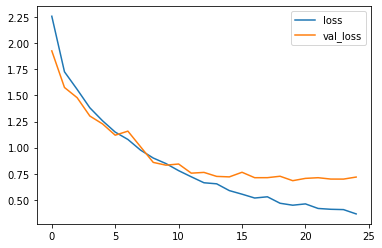

In [56]:
losses[['loss','val_loss']].plot()

In [57]:
model.evaluate(X_test,y_test)

23/23 [==============================] - 4s 155ms/step - loss: 0.6988 - accuracy: 0.7865


[0.6988075375556946, 0.7865168452262878]

In [68]:
preds = model.predict_classes(X_test)

Predictions  for x_test[2] , x_test[3], x_test[33] , x_test[36] ,x_test[59]![alt text](https://)

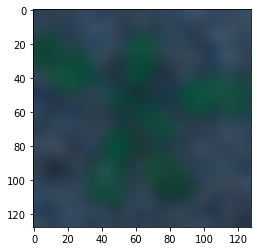

             label  value
8  Shepherds Purse      9              label  value
8  Shepherds Purse      9


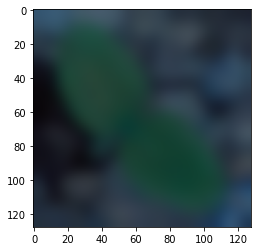

      label  value
1  Charlock      2       label  value
1  Charlock      2


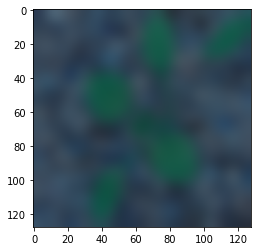

        label  value
2  Sugar beet      3         label  value
2  Sugar beet      3


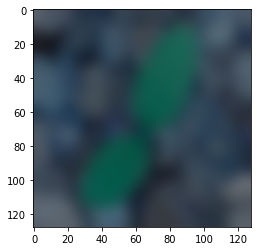

        label  value
2  Sugar beet      3         label  value
2  Sugar beet      3


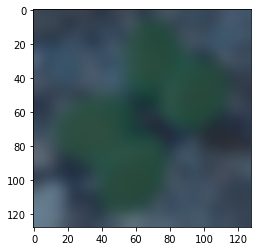

      label  value
0  Cleavers      1       label  value
0  Cleavers      1


In [89]:
for i in (2,3,33,36,59):
  x = X_test[i].reshape(1,128,128,3)
  plt.imshow(X_test[i])
  plt.show()
  p = model.predict_classes(x)
  print(label_df[label_df.values==p],label_df[label_df.values==y_test[i].argmax()])